In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # For data manipulation
import rampy as rp #Charles' libraries and functions
from scipy.optimize import curve_fit

In [3]:
df=pd.read_csv("../data/TGA_Ana/TGA_Data.csv",header=0,sep=',')
df.head()

,C,Biochar Hummers,C.1,Biochar Oxidizer,C.2,Coal EL Hummers,C.3,Coal EL Oxidizer,C.4,Coal EL Hummers Char,C.5,Coal EL Oxidizer Char,C.6,Coal Hummers,C.7,Coal Oxidizer,C.8,Coal Char Hummers,C.9,Coal Char Oxidizer
0,34.50,100.00,34.69,99.97,30.04,99.83,34.78,99.98,34.61,99.97,34.40,99.97,34.55,99.99,34.61,99.99,30.09,99.85,34.65,100.0
1,34.50,100.00,34.68,99.99,30.23,99.83,34.78,99.95,34.60,100.00,34.40,99.97,34.55,99.96,34.61,99.97,30.23,99.83,34.65,100.0
2,34.49,100.00,34.68,99.96,30.42,99.82,34.78,99.94,34.60,100.00,34.39,99.94,34.54,99.95,34.61,99.97,30.37,99.83,34.65,100.0
3,34.49,99.98,34.68,99.97,30.61,99.82,34.78,99.96,34.60,99.98,34.39,99.96,34.54,99.98,34.60,99.99,30.52,99.82,34.65,100.0
4,34.49,99.98,34.68,99.97,30.80,99.82,34.78,99.94,34.60,100.00,34.39,99.95,34.54,99.95,34.60,99.97,30.68,99.82,34.65,100.0


In [6]:
def minmax(y): return (y-y.min())/(y.max()-y.min())

In [5]:
x_ch = df['C.6']
x_cch = df['C.8']
x_co = df['C.7']
x_cco = df['C.9']

y_ch = df['Coal Hummers']
y_cch = df['Coal Char Hummers']
y_co = df['Coal Oxidizer']
y_cco = df['Coal Char Oxidizer']

In [6]:
standardFonts = {'family' : 'Arial',
                 'size' : 14}

subplotLabels = {'fontsize': rcParams['axes.titlesize'],
                 'fontweight' : 'bold',
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'left'}
    
matplotlib.rc('font', **standardFonts)
mpl.rcParams['mathtext.fontset']  = 'dejavuserif'
mpl.rcParams['font.family']       = 'Arial'
matplotlib.rc('font', **standardFonts)

mpl.rcParams['xtick.major.size']  = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size']  = 4
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.direction']   = 'in'
mpl.rcParams['xtick.top']         = True
mpl.rcParams['xtick.bottom']      = True
mpl.rcParams['xtick.labelsize']   = 16
mpl.rcParams['ytick.major.size']  = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size']  = 4
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.direction']   = 'in'
mpl.rcParams['ytick.left']        = True
mpl.rcParams['ytick.right']       = True
mpl.rcParams['ytick.labelsize']   = 16

mpl.rcParams['axes.linewidth']    = 2
mpl.rcParams['axes.titlesize']    = 20
mpl.rcParams['axes.titleweight']  = 'bold'
mpl.rcParams['axes.labelweight']  = 'bold'
mpl.rcParams['axes.labelsize']    = 16

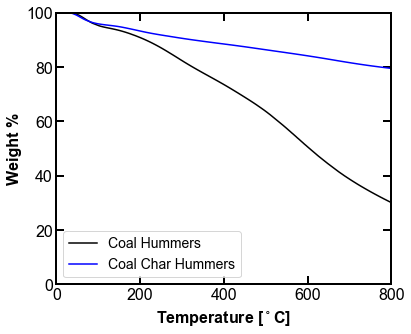

In [20]:
fig, ax = plt.subplots(1, figsize=(6, 5))
plt.xlim(0,800)
plt.ylim(0,100)

plt.plot(x_ch,y_ch,'k',label='Coal Hummers')
plt.plot(x_cch,y_cch,'b',label='Coal Char Hummers')

plt.xlabel("Temperature [$^\circ$C]", fontsize = 16)
plt.ylabel("Weight %", fontsize = 16)
# plt.gca().invert_xaxis()
plt.legend()
plt.savefig('../data/TGA_ana/fig5.png', format='png', dpi=300)

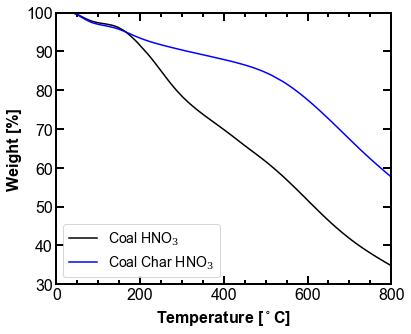

In [71]:
fig, ax = plt.subplots(1, figsize=(6, 5))
# ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.xaxis.set_minor_locator(MultipleLocator(50))
# ax.set_yticklabels([])
# plt.xlim(x.min(),x.max())

plt.xlim(0,800)
plt.ylim(30,100)

plt.plot(x_co,y_co,'k',label='Coal HNO$_{3}$')
plt.plot(x_cco,y_cco,'b',label='Coal Char HNO$_{3}$')
plt.xlabel("Temperature [$^\circ$C]", fontsize = 16)
plt.ylabel("Weight [%]", fontsize = 16)
# plt.gca().invert_xaxis()

plt.legend()

plt.savefig('../data/TGA_ana/fig4.png', format='png', dpi=300)

In [49]:
def diff(x,y): return np.diff(y)/np.diff(x)

In [92]:
from scipy.interpolate import interp1d

In [133]:
t = diff(x_co,y_co)
# f = interp1d(x_co[1:], t)
f2 = interp1d(x_co[1:], t, kind='slinear')

/anaconda3/envs/raman/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/envs/raman/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(-0.2, 0.2)

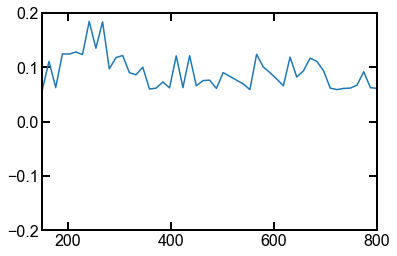

In [136]:
xnew = np.linspace(150, 800, num=51, endpoint=True)
plt.plot(xnew, -f2(xnew), '-')
plt.xlim(150,800)
plt.ylim(-0.2,0.2)

In [91]:
t = diff(x_cco,y_cco)

np.poly1d(x_cco[1:],t)


/anaconda3/envs/raman/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/envs/raman/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_yticklabels([])

plt.plot(x,y_co+y_cco.max()/1.2,'k',label='Coal Hummers')
plt.plot(x,y_cco,'b',label='Coal Char Hummers')
plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 16)
plt.ylabel("Abs intensity, a. u.", fontsize = 16)
plt.gca().invert_xaxis()
plt.legend()

Text(0.5, 1.0, 'Fig. 3: Fitted Biochar Hummer ')

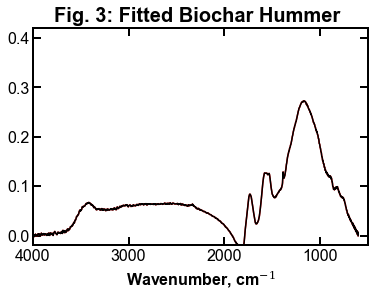

In [16]:
lb = 500 # The lower boundary of interest
hb = 4000 # The upper boundary of interest


#And let's plot the portion of interest before and after baseline subtraction:
# create a new plot for showing the spectrum
plt.figure()

plt.plot(1,2,2)
plt.plot(x,y,'r-')
plt.xlabel("Wavenumber, cm$^{-1}$")

plt.plot(x,y,'k-')

    
plt.xlim(lb,hb)
plt.gca().invert_xaxis()
plt.ylim(-0.02,0.42)
plt.xlabel("Wavenumber, cm$^{-1}$")
plt.title("Fig. 3: Fitted Biochar Hummer ")

Text(0.5, 1.0, 'Biochar')

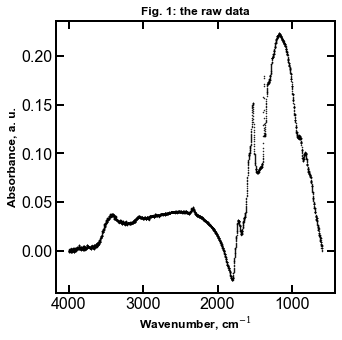

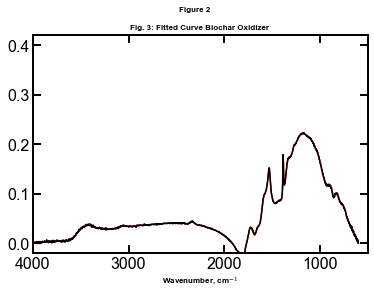

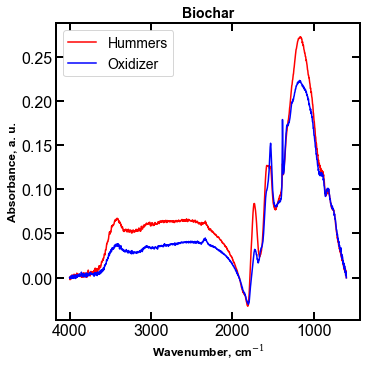

In [17]:
# Sample coal el oxidizer
x_o=Ftir[:,2]
y_o=Ftir[:,3]


# create a new plot for showing the spectrum
plt.figure(figsize=(5,5))
plt.plot(x_o,y_o,'k.',markersize=1)
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 12)
plt.gca().invert_xaxis()
plt.ylabel("Absorbance, a. u.", fontsize = 12)
plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")


lb = 500 # The lower boundary of interest
hb = 4000 # The upper boundary of interest


#And let's plot the portion of interest before and after baseline subtraction:
# create a new plot for showing the spectrum
plt.figure()

plt.plot(1,2,2)
plt.plot(x_o,y_o,'r-')
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 8)

#plt.tight_layout()
plt.suptitle('Figure 2', fontsize = 8,fontweight = 'bold')

    
plt.plot(x_o,y_o,'k-')

    
plt.xlim(lb,hb)
plt.gca().invert_xaxis()
plt.ylim(-0.02,0.42)
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 8)
plt.title("Fig. 3: Fitted Curve Biochar Oxidizer ",fontsize = 8,fontweight = "bold")



fig=plt.figure(figsize=(12,12))


#plt.plot(x_fit,y_fit_2,'r-',x_fit_o,y_fit_2_o,'k-')
plt.subplot(221)
Hummers = plt.plot(x,y,'r-',label='Hummers')
Oxidizer = plt.plot(x_o,y_o,'b-',label='Oxidizer')
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 12)
plt.gca().invert_xaxis()
plt.ylabel("Absorbance, a. u.", fontsize = 12)
plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")
plt.legend()
plt.title("Biochar",fontsize = 14,fontweight = "bold")